<a href="https://colab.research.google.com/github/ibsatportfolio/LoanPrediction-Project/blob/main/LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the Dependencies-**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Data Collection and Processing**

In [ ]:
dataset = pd.read_csv("train.csv")

In [ ]:
#printing the data
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
np.unique(dataset['Loan_Status'], return_counts=True)

(array(['N', 'Y'], dtype=object), array([192, 422]))

In [ ]:
# number of rows and columns
dataset.shape

(614, 13)

In [ ]:
# statistical measures
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# number of missing values in each column
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# dropping the missing values
dataset = dataset.dropna()

In [ ]:
# number of missing values in each column
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
# Dependent column values
dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# replacing the value of 3+ to 4
dataset =dataset.replace(to_replace='3+', value=4)

In [ ]:
# dependent values
dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

## **VISUALIZATION OF DATASET FEATURES**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


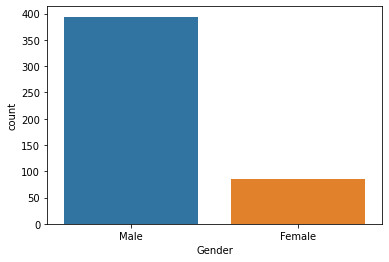

In [ ]:
sns.countplot(dataset['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


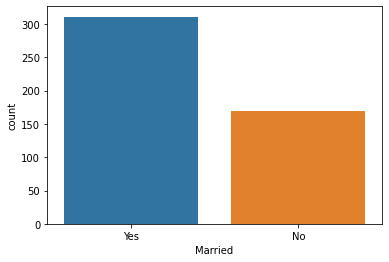

In [ ]:
sns.countplot(dataset['Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


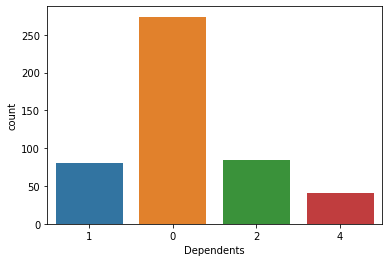

In [ ]:
sns.countplot(dataset['Dependents'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


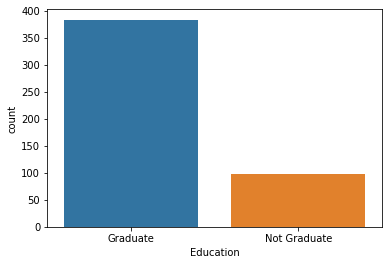

In [ ]:
sns.countplot(dataset['Education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


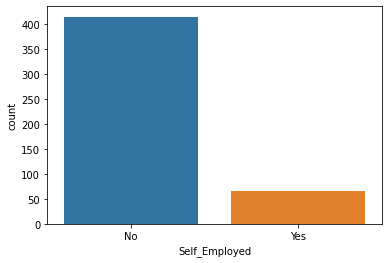

In [ ]:
sns.countplot(dataset['Self_Employed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


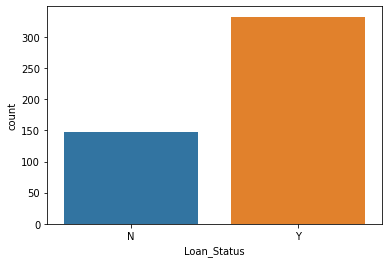

In [ ]:
sns.countplot(dataset['Loan_Status'])

In [ ]:
# convert categorical columns to numerical values
dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y


## **Linear Regression**

In [ ]:
#single variable
X= dataset.iloc[:,8].values
X

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 200.,
       114.,  17., 125.,  76., 133., 104., 315., 116., 191., 122., 110.,
        35.,  74., 106., 114., 320., 144., 184., 110.,  80.,  47., 134.,
        44., 144., 120., 144., 100., 120., 112., 134., 286.,  97.,  96.,
       135., 180., 144., 120.,  99., 165., 116., 258., 126., 312., 125.,
       136., 172.,  97.,  81., 187., 113., 176., 110., 180., 111., 167.,
        50., 136., 104., 210., 175., 131., 188.,  81., 122.,  25., 137.,
        50., 115., 131., 133., 151., 100., 225., 216.,  94., 136., 185.,
       154., 175., 259.,  44., 137.,  81., 194., 160.,  74.,  70.,  25.,
       102., 290.,  84.,  88., 242., 129., 185., 168., 175., 122., 187.,
       100.,  70.,  30., 225., 125., 118., 152., 244., 113.,  50., 600.,
       187., 255.,  98., 275., 121., 158.,  75., 112., 129.,  63., 200.,
        81., 187.,  87., 116., 101., 495., 116., 102., 180.,  73., 260.,
       108., 120.,  66., 188.,  48., 164., 160.,  7

In [ ]:
Y= dataset.iloc[:,12].values
Y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
#for array in one column
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
Y_train

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
    

## **Train the model:**

In [ ]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(X_train,Y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_Y=Lr.predict(X_test)

In [ ]:
print(pred_Y)
print(Y_test)

[[0.70850534]
 [0.67908852]
 [0.72093497]
 [0.70021891]
 [0.70809101]
 [0.68219593]
 [0.70539793]
 [0.71327003]
 [0.68944656]
 [0.71327003]
 [0.69731866]
 [0.71264855]
 [0.68261025]
 [0.71285571]
 [0.7039478 ]
 [0.7176204 ]
 [0.73087868]
 [0.71782756]
 [0.72673547]
 [0.71617028]
 [0.69628286]
 [0.67598111]
 [0.71865621]
 [0.71534164]
 [0.71264855]
 [0.66147987]
 [0.71948485]
 [0.72777128]
 [0.70249768]
 [0.70912682]
 [0.73067152]
 [0.73253597]
 [0.66893765]
 [0.70021891]
 [0.71389151]
 [0.71451299]
 [0.71223423]
 [0.71617028]
 [0.71347719]
 [0.71264855]
 [0.69462557]
 [0.71223423]
 [0.7087125 ]
 [0.70954114]
 [0.71803472]
 [0.7223851 ]
 [0.70746953]
 [0.70705521]
 [0.70995546]
 [0.71285571]
 [0.71741324]
 [0.7039478 ]
 [0.7223851 ]
 [0.71927769]
 [0.7087125 ]
 [0.72072781]
 [0.70477644]
 [0.71016262]
 [0.70519076]
 [0.71472015]
 [0.72859992]
 [0.70042607]
 [0.70456928]
 [0.71264855]
 [0.70746953]
 [0.64573566]
 [0.72259226]
 [0.70767669]
 [0.72673547]
 [0.71617028]
 [0.71119842]
 [0.71

In [ ]:
Lr.coef_

array([[-0.00020716]])

In [ ]:
Lr.intercept_

array([0.7360577])

In [ ]:
 Y_test - pred_Y

array([[-0.70850534],
       [-0.67908852],
       [ 0.27906503],
       [-0.70021891],
       [-0.70809101],
       [-0.68219593],
       [ 0.29460207],
       [ 0.28672997],
       [-0.68944656],
       [ 0.28672997],
       [ 0.30268134],
       [-0.71264855],
       [-0.68261025],
       [ 0.28714429],
       [-0.7039478 ],
       [ 0.2823796 ],
       [ 0.26912132],
       [ 0.28217244],
       [-0.72673547],
       [ 0.28382972],
       [ 0.30371714],
       [-0.67598111],
       [ 0.28134379],
       [ 0.28465836],
       [ 0.28735145],
       [-0.66147987],
       [ 0.28051515],
       [ 0.27222872],
       [ 0.29750232],
       [ 0.29087318],
       [ 0.26932848],
       [ 0.26746403],
       [ 0.33106235],
       [-0.70021891],
       [ 0.28610849],
       [ 0.28548701],
       [ 0.28776577],
       [ 0.28382972],
       [ 0.28652281],
       [-0.71264855],
       [ 0.30537443],
       [ 0.28776577],
       [ 0.2912875 ],
       [ 0.29045886],
       [-0.71803472],
       [ 0

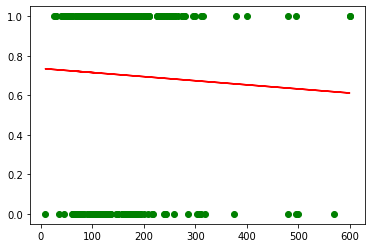

In [ ]:
#ploting
plt.scatter(X_train,Y_train,color='green')
plt.plot(X_train,Lr.predict(X_train),color='red')

## **MULTI LINEAR REGRESSION**

In [ ]:
X=dataset.iloc[:,[1,2,3]].values
X

array([[1, 1, '1'],
       [1, 1, '0'],
       [1, 1, '0'],
       ...,
       [1, 1, '1'],
       [1, 1, '2'],
       [0, 0, '0']], dtype=object)

In [ ]:
Y=dataset.iloc[:,4].values
Y

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
Y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
X_test

array([[1, 1, '0'],
       [1, 1, '0'],
       [1, 0, '2'],
       [1, 1, '2'],
       [1, 1, '0'],
       [1, 0, '0'],
       [1, 1, '0'],
       [1, 1, '0'],
       [1, 1, '2'],
       [1, 1, '1'],
       [1, 1, '0'],
       [0, 1, '1'],
       [1, 1, '0'],
       [1, 1, '2'],
       [0, 0, '0'],
       [1, 1, '0'],
       [0, 0, '0'],
       [0, 0, '0'],
       [1, 1, '2'],
       [1, 1, '0'],
       [1, 0, '0'],
       [1, 1, 4],
       [1, 1, '0'],
       [1, 1, '2'],
       [1, 1, '1'],
       [0, 1, '0'],
       [0, 0, '1'],
       [1, 1, '0'],
       [0, 0, '0'],
       [1, 1, '0'],
       [1, 1, '0'],
       [1, 1, '2'],
       [0, 0, '1'],
       [1, 1, '0'],
       [0, 0, '0'],
       [0, 1, '2'],
       [1, 1, '0'],
       [1, 1, '1'],
       [1, 1, 4],
       [1, 1, '2'],
       [1, 1, '0'],
       [0, 0, '0'],
       [1, 0, '0'],
       [1, 1, '0'],
       [1, 1, '2'],
       [1, 1, '0'],
       [0, 0, '0'],
       [1, 0, '0'],
       [0, 0, '1'],
       [1, 1, '0'],
    

In [ ]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(X_train,Y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_Y=Lr.predict(X_test)

In [ ]:
print(pred_Y)
print(Y_test)

[0.81123748 0.81123748 0.737342   0.7787552  0.81123748 0.76982427
 0.81123748 0.81123748 0.7787552  0.79499634 0.81123748 0.89801263
 0.81123748 0.7787552  0.87284056 0.81123748 0.87284056 0.87284056
 0.7787552  0.81123748 0.76982427 0.74627293 0.81123748 0.7787552
 0.79499634 0.91425377 0.85659942 0.81123748 0.87284056 0.81123748
 0.81123748 0.7787552  0.85659942 0.81123748 0.87284056 0.88177149
 0.81123748 0.79499634 0.74627293 0.7787552  0.81123748 0.87284056
 0.76982427 0.81123748 0.7787552  0.81123748 0.87284056 0.76982427
 0.85659942 0.81123748 0.81123748 0.79499634 0.79499634 0.79499634
 0.7787552  0.79499634 0.76982427 0.7787552  0.75358313 0.76982427
 0.76982427 0.87284056 0.81123748 0.76982427 0.79499634 0.7787552
 0.7787552  0.89801263 0.79499634 0.79499634 0.81123748 0.81123748
 0.76982427 0.87284056 0.87284056 0.76982427 0.76982427 0.7787552
 0.85659942 0.81123748 0.76982427 0.91425377 0.81123748 0.81123748
 0.81123748 0.74627293 0.79499634 0.7787552  0.74627293 0.7949963

In [ ]:
Y_test-pred_Y

array([ 0.18876252, -0.81123748,  0.262658  ,  0.2212448 ,  0.18876252,
        0.23017573,  0.18876252,  0.18876252, -0.7787552 ,  0.20500366,
        0.18876252,  0.10198737,  0.18876252,  0.2212448 ,  0.12715944,
        0.18876252, -0.87284056,  0.12715944,  0.2212448 , -0.81123748,
        0.23017573,  0.25372707,  0.18876252,  0.2212448 , -0.79499634,
        0.08574623, -0.85659942,  0.18876252,  0.12715944,  0.18876252,
        0.18876252,  0.2212448 ,  0.14340058,  0.18876252,  0.12715944,
        0.11822851,  0.18876252,  0.20500366,  0.25372707, -0.7787552 ,
        0.18876252,  0.12715944, -0.76982427,  0.18876252,  0.2212448 ,
        0.18876252, -0.87284056,  0.23017573,  0.14340058,  0.18876252,
        0.18876252,  0.20500366,  0.20500366,  0.20500366,  0.2212448 ,
       -0.79499634,  0.23017573,  0.2212448 ,  0.24641687,  0.23017573,
        0.23017573,  0.12715944, -0.81123748,  0.23017573, -0.79499634,
        0.2212448 , -0.7787552 ,  0.10198737,  0.20500366, -0.79

## **CLASSIFICATION**

In [ ]:
X=dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]].values
X

array([[1, 1, '1', ..., 360.0, 1.0, 0],
       [1, 1, '0', ..., 360.0, 1.0, 2],
       [1, 1, '0', ..., 360.0, 1.0, 2],
       ...,
       [1, 1, '1', ..., 360.0, 1.0, 2],
       [1, 1, '2', ..., 360.0, 1.0, 2],
       [0, 0, '0', ..., 360.0, 0.0, 1]], dtype=object)

In [ ]:
Y=dataset.iloc[:,12].values
Y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[1, 1, 4, ..., 360.0, 1.0, 0],
       [0, 0, '0', ..., 360.0, 1.0, 0],
       [0, 1, '1', ..., 360.0, 1.0, 2],
       ...,
       [1, 0, '0', ..., 360.0, 1.0, 2],
       [1, 1, '0', ..., 360.0, 1.0, 2],
       [1, 1, '0', ..., 360.0, 0.0, 2]], dtype=object)

In [ ]:
X_test

array([[1, 1, '0', ..., 360.0, 1.0, 0],
       [1, 1, '0', ..., 360.0, 1.0, 2],
       [1, 1, '0', ..., 180.0, 1.0, 1],
       ...,
       [1, 0, '0', ..., 180.0, 1.0, 1],
       [1, 1, '2', ..., 240.0, 1.0, 1],
       [1, 1, '2', ..., 360.0, 1.0, 0]], dtype=object)

## **KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#training the data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred_Y=knn.predict(X_test)
pred_Y

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
Y_test

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
C_m=confusion_matrix(Y_test,pred_Y)
C_m

array([[ 5, 30],
       [ 9, 52]])

In [ ]:
print(classification_report(Y_test,pred_Y))

              precision    recall  f1-score   support

           0       0.36      0.14      0.20        35
           1       0.63      0.85      0.73        61

    accuracy                           0.59        96
   macro avg       0.50      0.50      0.47        96
weighted avg       0.53      0.59      0.54        96



Text(0, 0.5, 'Accuracy Rate')

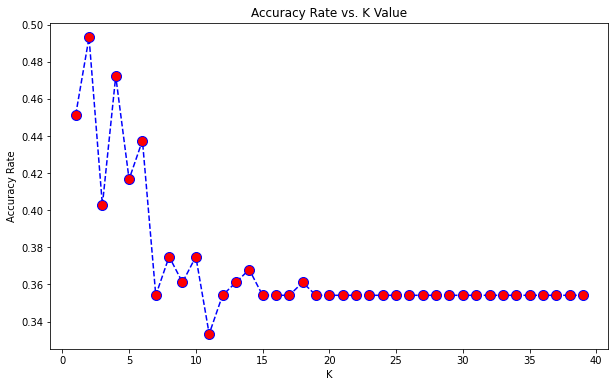

In [ ]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    accuracy_rate.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

## MULTI LAYER PERCEPTRON(NEURAL NETWORK)CLASSIFIER

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nnc=MLPClassifier(hidden_layer_sizes=(3,4,7),max_iter=500)
nnc.fit(X_train,Y_train)
pred_nnc=nnc.predict(X_test)
print(classification_report(Y_test,pred_nnc))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05        35
           1       0.64      0.98      0.77        61

    accuracy                           0.64        96
   macro avg       0.57      0.51      0.41        96
weighted avg       0.59      0.64      0.51        96



## Support Vector Machine Model(svm)Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
clr=svm.SVC(C=0.5)
clr.fit(X_train,Y_train)
pred_nnc=clr.predict(X_test)
print(classification_report(Y_test,pred_nnc))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.64      1.00      0.78        61

    accuracy                           0.64        96
   macro avg       0.32      0.50      0.39        96
weighted avg       0.40      0.64      0.49        96



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


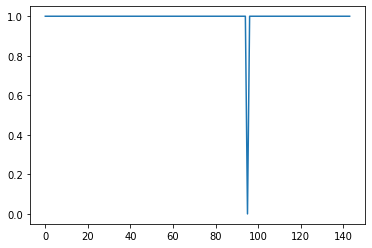

In [ ]:
plt.plot(pred_nnc)

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
clr=svm.SVC()
clr.fit(X_train,Y_train)
pred_nnc=clr.predict(X_train)
print(classification_report(Y_train,pred_nnc))

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        97
           1       0.72      1.00      0.84       239

    accuracy                           0.73       336
   macro avg       0.86      0.53      0.47       336
weighted avg       0.80      0.73      0.62       336



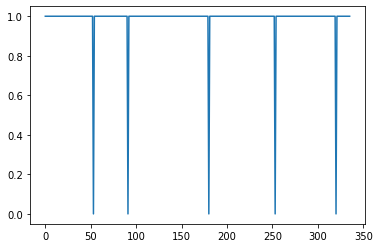

In [ ]:
plt.plot(pred_nnc)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
DTClassifier = DecisionTreeClassifier(random_state=0)
DTClassifier.fit(X_train,Y_train)
pred_nnc=DTClassifier.predict(X_train)
print(classification_report(Y_train,pred_nnc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       271

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384

